Image Clustering with DBSCAN
=========================================

For this notebook we are going to try a clustering operation on images to see if we can use DBSCAN (and possibly other) clustering algorithms on different
image metrics to obtain the best result.  

In [1]:
import os
import itertools

import visvis as vv
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv     # opencv-python

from sklearn.cluster import DBSCAN, KMeans
from scipy import ndimage
from PIL import Image

from IPython.display import HTML

## Dataset

For this quick example I decided to use google images to pull down a set of about 20 images that are either dogs, paper or bikes.  Again I am not trying to
classify the images but instead to see how well I can get them to cluster.  

Using this pattern I have access to the images, however they are different sizes and even different formats (`.jpg`, `.png`).  

In [2]:
IMAGE_FOLDERS = ['bike', 'dog', 'paper']

# Jupyter notebooks don't have __file__ but getcwd is the notes directory
BASE_FOLDER = os.path.join(os.getcwd(), '..', 'raw_data',  'random_images')

def load_images(path):
    results = []
    for image_file in os.listdir(path):
        results.append({
            'name': image_file, 
            'raw': Image.open(os.path.join(path, image_file)) #   imread(os.path.join(path, image_file))
        })
    return results

dataset = {
    image_group: load_images(os.path.join(BASE_FOLDER, image_group))
    for image_group in IMAGE_FOLDERS
}

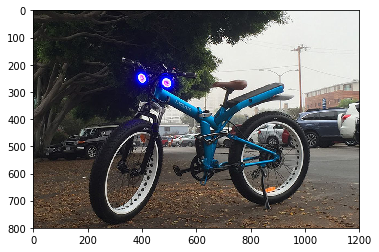

In [3]:
plt.imshow(dataset['bike'][0]['raw'])
plt.show()

## Image manipulation

At this point we have all our images loaded and an Image object that we can work with, however what we need to do is to 
adjust the shape of the images to all match.  For our use case we are going to set the image sizes to be

    640x480
    
We are not going to crop, but instead we are going to start by shrinking the images (and even skewing them) to get them
to fit that size.  

In [4]:
for image_group, images in dataset.items():
   for img in images:
       img['data'] = img['raw'].resize((640, 480))

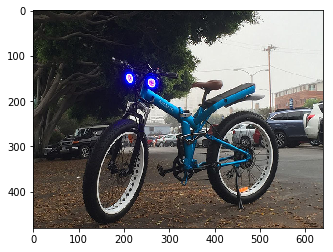

In [5]:
plt.imshow(dataset['bike'][0]['data'])
plt.show()

## Clustering

At this point we can take our images and attempt to cluster them together.  We are going to start with KMeans that uses only 3 clusters.  

In [6]:
cluster_count = 8

images = [x for x in itertools.chain(*dataset.values())]
X = [np.array(x['data'].convert('L')).flatten() for x in images]

kmeans = KMeans(n_clusters=cluster_count, random_state=0).fit(X)

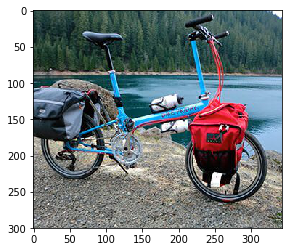

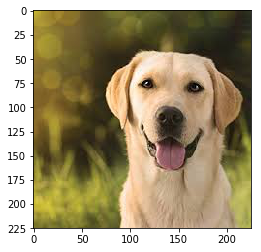

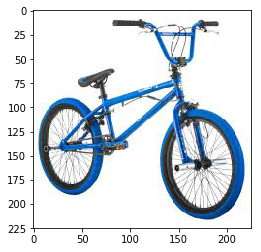

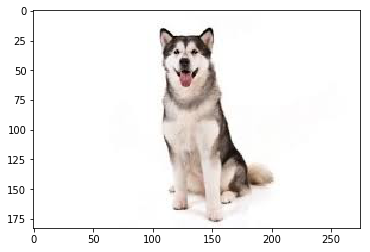

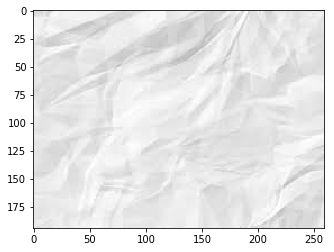

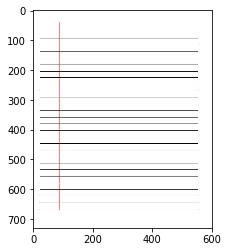

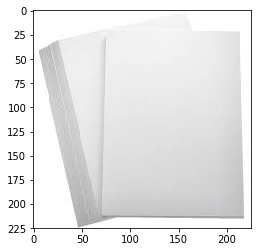

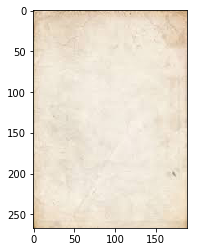

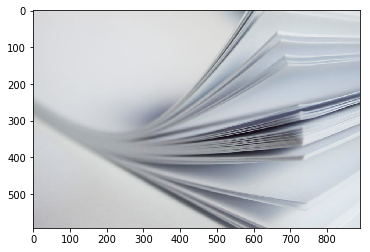

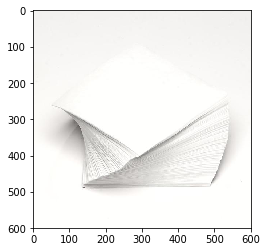

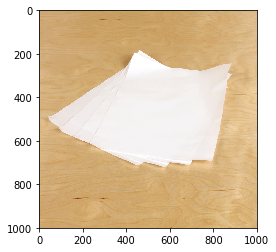

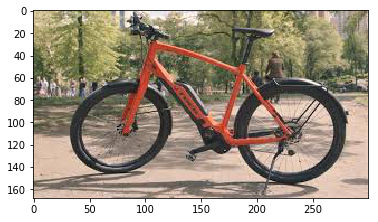

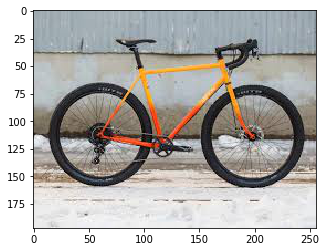

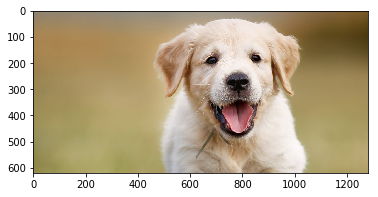

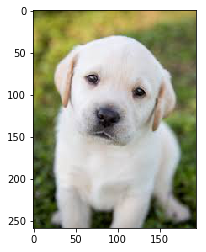

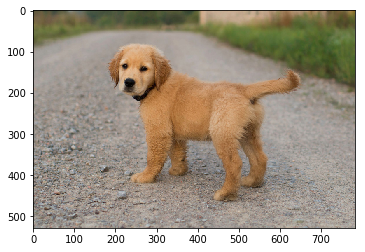

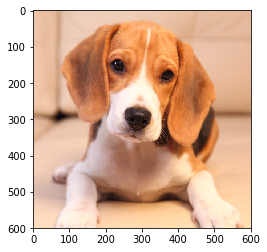

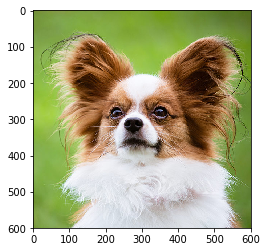

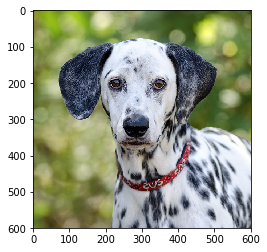

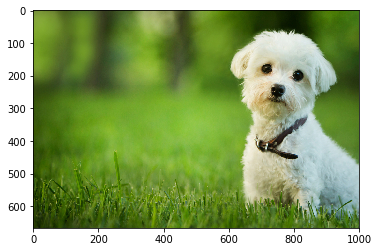

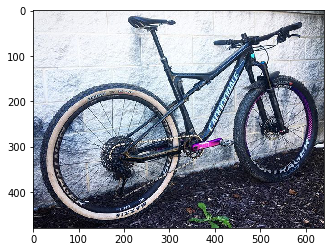

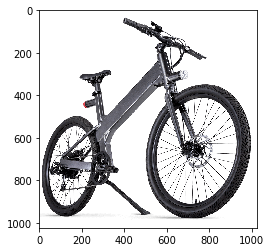

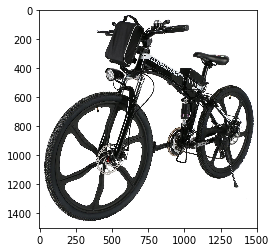

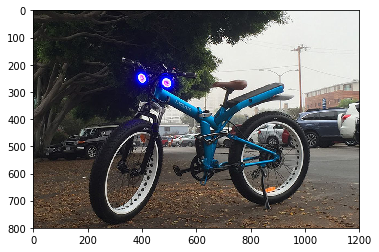

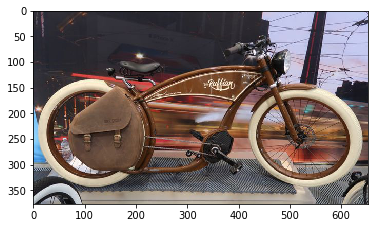

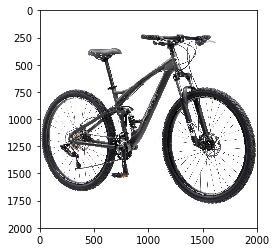

In [7]:
labels = kmeans.predict(X)

for g in range(cluster_count):
    display(HTML(f'<h2 style="background-color: lightblue">Cluster {g}</h2>'))
    for i, l in enumerate(labels):
        if l == g:
            plt.imshow(images[i]['raw'])
            plt.show()
            #display(images[i]['raw'])        
    
#kmeans.predict([np.array(dataset['dog'][0]['data'].convert('L')).flatten()])

## KMeans Analysis

So after using a few different clustering values, it appears that it did best with grouping the dogs, but wasn't great at grouping others.
Even at lower group counts.  One thing we could do is attempt to use different features from the image.  

Lets start with SURF.  

In [8]:
#display(dir(cv))
sd = cv.FeatureDetector_create("SURF")
keypoints = sd.detect(dataset['bike'][0]['raw'])
kp,des = surf.compute(img, keypoints)

AttributeError: module 'cv2.cv2' has no attribute 'FeatureDetector_create'

## References

* [Create Deep Learning Dataset using Google Images](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)
* [Clustering Internal-Image Groups using K-Means](https://dzone.com/articles/cluster-image-with-k-means)
* [Clustering Billion's of Images with Large-Scale Nearest Neighbor](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/32616.pdf)
* [Image Segmentation using DBSCAN](http://yaikhom.com/2015/12/29/image-segmentaion-using-dbscan-clustering.html)
* [5 Clustering Algorithms Data Scientists Need to Know](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68) 
* [SURF - Speeded up Robust Features](https://en.wikipedia.org/wiki/Speeded_up_robust_features)
* [SIFT - Scale Invariant Feature Transform](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform)
* [OpenCV - Open Source Computer Vision Library](https://opencv.org/)
* [Whitepaper - Distintive Image Features from Scale-Invariant Keypoints](https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf)